Exploring Dandiset 001174: Calcium Imaging in SMA and M1 of Macaques
*This notebook was generated with AI assistance. Please verify all code and interpretations critically before drawing scientific conclusions.*

# Overview
This notebook introduces Dandiset 001174 containing calcium imaging data from supplementary motor area (SMA) and primary motor cortex (M1) of rhesus macaques. The dataset includes:
- Raw calcium imaging videos
- Processed fluorescence traces
- Event amplitude data for detected calcium events
- Cell segmentation masks (spatial footprints)

**Dandiset Link:** [https://dandiarchive.org/dandiset/001174/0.250331.2218](https://dandiarchive.org/dandiset/001174/0.250331.2218)

# What This Notebook Covers
1. Accessing Dandiset metadata and file structure
2. Exploring NWB file contents and organization
3. Visualizing key data modalities:
   - Cell spatial footprints
   - Fluorescence traces
   - Event amplitudes
   - Raw imaging frames
4. Basic quantitative analysis of neural activity

# Required Packages
- pynwb
- h5py
- remfile
- numpy
- matplotlib
- pandas
- dandi

# Dandiset Metadata
First, we retrieve basic metadata about the Dandiset using the DANDI API.

In [1]:
from dandi.dandiapi import DandiAPIClient

client = DandiAPIClient()
dandiset = client.get_dandiset("001174", "0.250331.2218")
metadata = dandiset.get_raw_metadata()

print(f"Dandiset name: {metadata['name']}")
print(f"Description: {metadata['description']}")
print(f"Dandiset URL: {metadata['url']}")

Dandiset name: Calcium imaging in SMA and M1 of macaques
Description: The study of motor cortices in non-human primates is relevant to our understanding of human motor control, both in healthy conditions and in movement disorders. Calcium imaging and miniature microscopes allow the study of multiple genetically identified neurons with excellent spatial resolution. We used this method to examine activity patterns of projection neurons in deep layers of the supplementary motor (SMA) and primary motor areas (M1) in four rhesus macaques. We implanted gradient index lenses and expressed GCaMP6f to image calcium transients while the animals were at rest or engaged in an arm reaching task. We tracked the activity of SMA and M1 neurons across conditions, examined cell pairs for synchronous activity, and assessed whether SMA and M1 neuronal activation followed specific sequential activation patterns. We demonstrate the value of in vivo calcium imaging for studying patterns of activity in groups

# Exploring NWB Files
List available NWB files and their sizes. Data is organized by subject and session.

In [2]:
from itertools import islice

# List first 20 NWB files
assets = list(islice(dandiset.get_assets_by_glob("*.nwb"), 20))

print(f"Number of .nwb files (showing up to 20): {len(assets)}\n")
for i, asset in enumerate(assets):
    print(f"{i+1}. {asset.path} - {asset.size/1e9:.2f} GB")

Number of .nwb files (showing up to 20): 20

1. sub-V/sub-V_ses-20230309T110929_ophys.nwb - 10.66 GB
2. sub-Q/sub-Q_ophys.nwb - 0.79 GB
3. sub-Q/sub-Q_ses-20220922T131747_ophys.nwb - 0.79 GB
4. sub-Q/sub-Q_ses-20221003T131952_ophys.nwb - 1.70 GB
5. sub-Q/sub-Q_ses-20221028T121142_ophys.nwb - 1.56 GB
6. sub-Q/sub-Q_ses-20221201T132256_ophys.nwb - 1.66 GB
7. sub-Q/sub-Q_ses-20221202T122907_ophys.nwb - 1.57 GB
8. sub-Q/sub-Q_ses-20221206T121002_ophys.nwb - 25.12 GB
9. sub-Q/sub-Q_ses-20220915T133954_ophys.nwb - 1.18 GB
10. sub-Q/sub-Q_ses-20221201T134628_ophys.nwb - 0.84 GB
11. sub-Q/sub-Q_ses-20221028T123313_ophys.nwb - 1.12 GB
12. sub-Q/sub-Q_ses-20220922T133032_ophys.nwb - 1.57 GB
13. sub-Q/sub-Q_ses-20221003T134805_ophys.nwb - 1.56 GB
14. sub-Q/sub-Q_ses-20221202T125146_ophys.nwb - 0.91 GB
15. sub-Q/sub-Q_ses-20221206T123719_ophys.nwb - 0.90 GB
16. sub-V/sub-V_ses-20230316T094035_ophys.nwb - 10.25 GB
17. sub-V/sub-V_ses-20230309T104556_ophys.nwb - 24.74 GB
18. sub-F/sub-F_ses-20240213

# Exploring an Example NWB File
We'll examine `sub-Q/sub-Q_ses-20221206T121002_ophys.nwb` to understand the data structure.

In [3]:
import pynwb
import h5py
import remfile

# Load specific NWB file
asset_path = 'sub-Q/sub-Q_ses-20221206T121002_ophys.nwb'
asset = next(dandiset.get_assets_by_glob(asset_path))
url = asset.download_url

# Open remote file
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file, 'r')
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()

# Print session metadata
print('Session description:', nwb.session_description)
print('Session start time:', nwb.session_start_time)
print('Subject ID:', nwb.subject.subject_id)
print('Species:', nwb.subject.species)
print('Sex:', nwb.subject.sex)
print('Age:', getattr(nwb.subject, 'age', 'n/a'))

Session description: Calcium imaging in SMA during the spontaneous condition
Session start time: 2022-12-06 12:10:02.429000+00:00
Subject ID: Q
Species: Macaca mulatta
Sex: F
Age: P5Y


# Data Structure Overview
Preview dimensions of key data arrays.

In [4]:
# Access processing module
ophys = nwb.processing['ophys']

# Get fluorescence traces
fluorescence = ophys.data_interfaces['Fluorescence']
rrs = fluorescence.roi_response_series['RoiResponseSeries']
print('Fluorescence traces shape:', rrs.data.shape)

# Get cell masks
plane_seg = ophys.data_interfaces['ImageSegmentation'].plane_segmentations['PlaneSegmentation']
roi_df = plane_seg.to_dataframe()
print('Number of ROIs (cells):', len(roi_df))
print('Sample mask shape:', plane_seg['image_mask'].data[0].shape)

# Get raw movie
onphs = nwb.acquisition['OnePhotonSeries']
print('Raw movie shape:', onphs.data.shape)

io.close()

Fluorescence traces shape: (12218, 18)


Number of ROIs (cells): 18
Sample mask shape: (310, 186)
Raw movie shape: (12218, 1280, 800)


# Visualizing Cell Masks
## Single Cell Footprint
Visualize the spatial mask for the first detected cell.

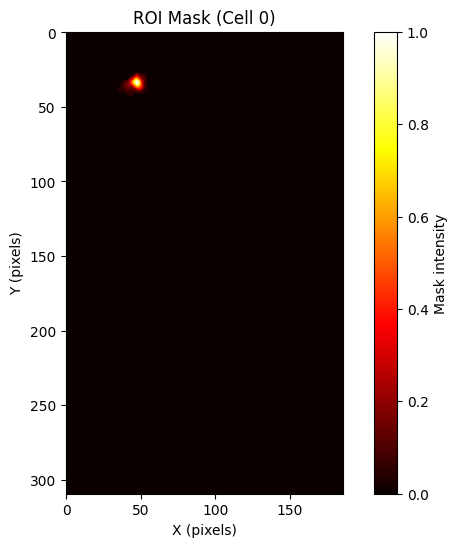

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Reopen file for visualization
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file, 'r')
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()
ophys = nwb.processing['ophys']
plane_seg = ophys.data_interfaces['ImageSegmentation'].plane_segmentations['PlaneSegmentation']

# Plot first mask
mask = plane_seg['image_mask'].data[0][:]
plt.figure(figsize=(8, 6))
plt.imshow(mask, cmap='hot')
plt.title('ROI Mask (Cell 0)')
plt.colorbar(label='Mask intensity')
plt.xlabel('X (pixels)')
plt.ylabel('Y (pixels)')
plt.show()

io.close()

## All Cell Footprints
Heatmap showing spatial distribution of all detected cells.

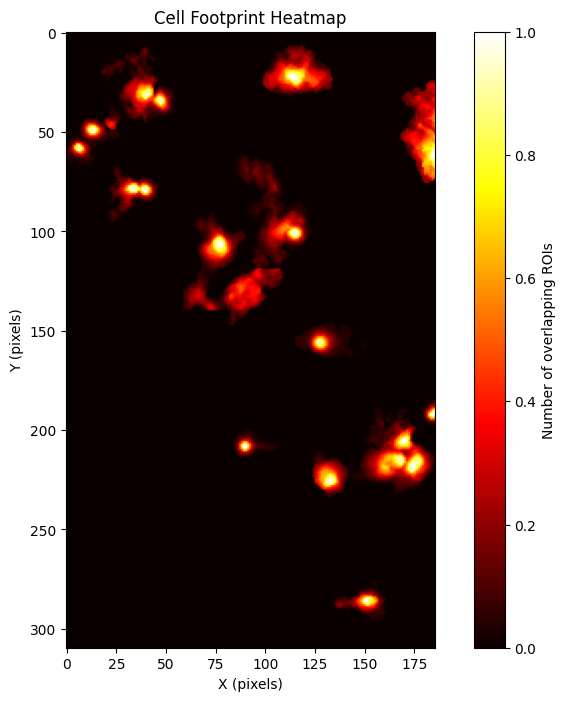

In [6]:
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file, 'r')
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()
ophys = nwb.processing['ophys']
plane_seg = ophys.data_interfaces['ImageSegmentation'].plane_segmentations['PlaneSegmentation']

# Create composite mask
mask_arrays = [plane_seg['image_mask'].data[i][:] for i in range(len(plane_seg))]
max_mask = np.max(mask_arrays, axis=0)

plt.figure(figsize=(10, 8))
plt.imshow(max_mask, cmap='hot')
plt.title('Cell Footprint Heatmap')
plt.colorbar(label='Number of overlapping ROIs')
plt.xlabel('X (pixels)')
plt.ylabel('Y (pixels)')
plt.show()

io.close()

# Neural Activity Traces
## Fluorescence Trace
Plot calcium dynamics for the first cell.

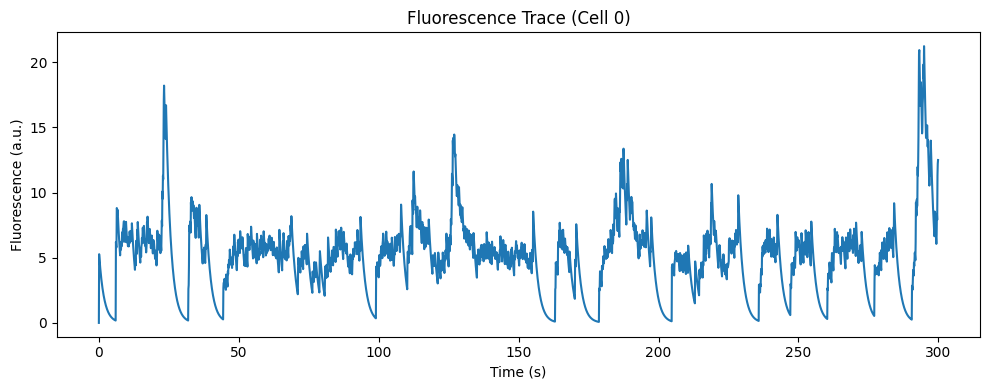

In [7]:
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file, 'r')
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()
ophys = nwb.processing['ophys']
rrs = ophys.data_interfaces['Fluorescence'].roi_response_series['RoiResponseSeries']

# Plot first 5 minutes
sampling_rate = rrs.rate
n_seconds = 5 * 60
n_samples = int(n_seconds * sampling_rate)
trace = rrs.data[:n_samples, 0]

plt.figure(figsize=(10, 4))
plt.plot(np.arange(n_samples)/sampling_rate, trace)
plt.title('Fluorescence Trace (Cell 0)')
plt.xlabel('Time (s)')
plt.ylabel('Fluorescence (a.u.)')
plt.tight_layout()
plt.show()

io.close()

## Event Amplitudes
Visualize detected calcium events for the first cell. Event amplitudes represent the magnitude of neural activity events identified in the fluorescence trace.

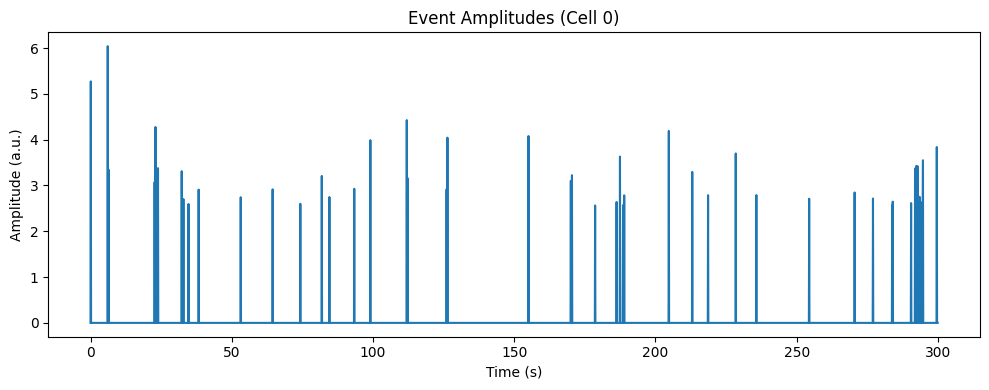

In [8]:
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file, 'r')
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()
ophys = nwb.processing['ophys']
event_amp = ophys.data_interfaces['EventAmplitude']

# Plot first 5 minutes
sampling_rate = event_amp.rate
n_seconds = 5 * 60
n_samples = int(n_seconds * sampling_rate)
ampl_trace = event_amp.data[:n_samples, 0]

plt.figure(figsize=(10, 4))
plt.plot(np.arange(n_samples)/sampling_rate, ampl_trace)
plt.title('Event Amplitudes (Cell 0)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (a.u.)')
plt.tight_layout()
plt.show()

io.close()

# Raw Data Preview
Montage of first 12 frames from the imaging session.

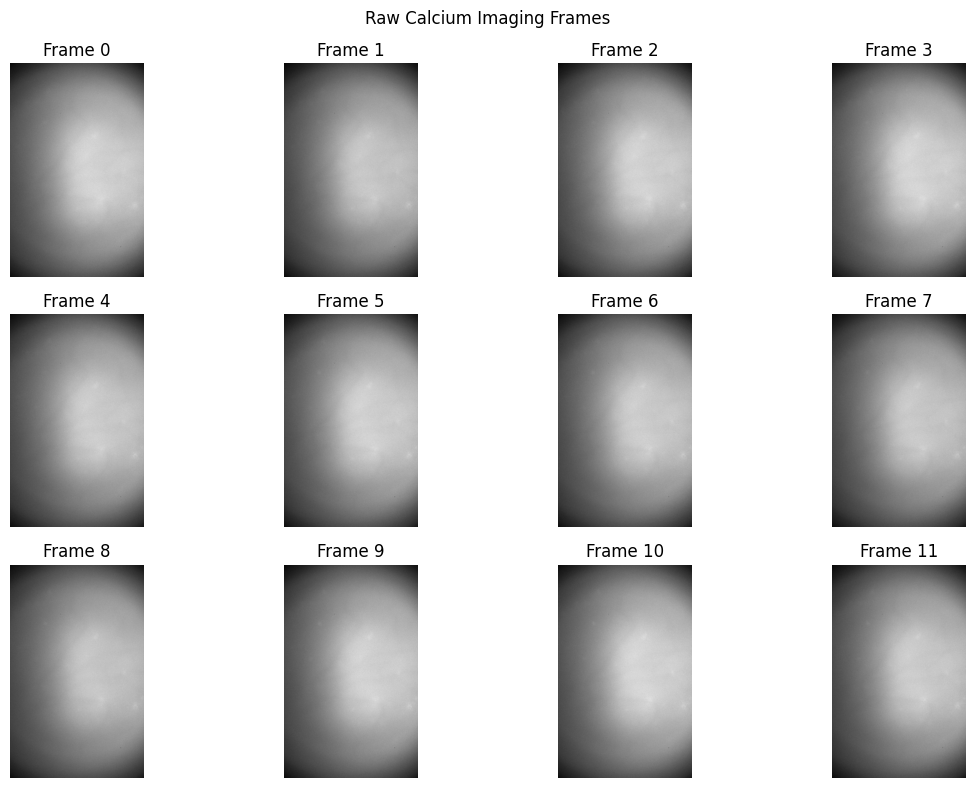

In [9]:
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file, 'r')
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()
onphs = nwb.acquisition['OnePhotonSeries']

# Create frame montage
frames_to_show = 12
movie_segment = onphs.data[:frames_to_show]
n_cols = 4
n_rows = int(np.ceil(frames_to_show / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
for i in range(frames_to_show):
    ax = axes[i // n_cols, i % n_cols]
    ax.imshow(movie_segment[i], cmap='gray')
    ax.set_title(f'Frame {i}')
    ax.axis('off')
    
# Hide unused subplots
for i in range(frames_to_show, n_rows * n_cols):
    axes.flat[i].axis('off')
    
plt.suptitle('Raw Calcium Imaging Frames', y=0.98)
plt.tight_layout()
plt.show()

io.close()

# Quantitative Analysis
Calculate event rates across all cells. Event rate is measured as the number of detected calcium events per minute.

In [10]:
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file, 'r')
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()
ophys = nwb.processing['ophys']
rrs = ophys.data_interfaces['Fluorescence'].roi_response_series['RoiResponseSeries']
event_amp = ophys.data_interfaces['EventAmplitude']

# Calculate event rates
num_cells = rrs.data.shape[1]
sampling_rate = rrs.rate
total_minutes = rrs.data.shape[0] / sampling_rate / 60
event_rates = [(event_amp.data[:,i] > 0).sum() / total_minutes for i in range(num_cells)]

print("Event rates (events per minute):")
print([f"{rate:.2f}" for rate in event_rates])
print(f"\nMean event rate: {np.mean(event_rates):.2f} ± {np.std(event_rates):.2f} events/min")

io.close()

Event rates (events per minute):
['10.07', '1.03', '6.97', '1.57', '23.08', '1.82', '1.23', '1.62', '3.58', '2.26', '4.08', '6.24', '0.64', '5.30', '1.03', '49.40', '39.14', '70.96']

Mean event rate: 12.78 ± 19.53 events/min


# Conclusion and Next Steps
This notebook demonstrated how to:
1. Access metadata and files in Dandiset 001174
2. Explore NWB file structure and organization
3. Visualize key data modalities: raw frames, cell footprints, and neural traces
4. Perform basic quantitative analysis of neural activity

## Suggested Next Analyses:
- Compare activity patterns across sessions/subjects
- Calculate pairwise correlations between cells
- Investigate temporal relationships in neural activity through cross-correlation
- Relate neural activity to behavioral data from arm-reaching tasks
- Use [NeuroSift](https://neurosift.app/) for interactive exploration of NWB files

*Note: Always consider computational costs when working with large imaging datasets.*